# Analysis of Titanic Dataset

**import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading in the data

In [2]:
df_titanic = pd.read_excel('titanic_data.xlsx', index_col=0)
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.2+ KB


**Rename some columns**

1. `who` --> `age_group`
2. `sex` --> `gender`

In [4]:
df_titanic.rename(columns={'who':'age_group', 'sex':'gender'}, inplace=True)


In [5]:
df_titanic['alive'] = df_titanic['alive'].map({'no':False, 'yes':True})
df_titanic.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,age_group,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,True,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,True,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,False,True


In [6]:
df_titanic.isna().sum()

survived         0
pclass           0
gender           0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
age_group        0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df_titanic.isna().sum() / len(df_titanic)

survived       0.000000
pclass         0.000000
gender         0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
age_group      0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

## Cleaning the data

**Drop the `deck` column**

This column has too many (over `77 %`) missing values to be useful.

In [8]:
df_titanic.drop(columns='deck', inplace=True)

**Duplicate information in related or correlated columns**

1. `survived` and `alive`
2. `pclass` and `class`
3. `embarked` and `embark_town`

In [9]:
cols = ['survived', 'pclass','embarked']
df_titanic.drop(columns=cols, inplace=True)
df_titanic.head()

,gender,age,sibsp,parch,fare,class,age_group,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,False,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,True,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,True,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,False,True


We can discover other related fiels by using calculating **correlation**

In [10]:
df_titanic.corr()

,age,sibsp,parch,fare,adult_male,alive,alone
age,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [11]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   age_group    891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    bool   
 10  alone        891 non-null    bool   
dtypes: bool(3), float64(2), int64(2), object(4)
memory usage: 65.3+ KB


In [12]:
df_titanic.describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


## Missing data

In [13]:
df_titanic.isna().sum()

gender           0
age            177
sibsp            0
parch            0
fare             0
class            0
age_group        0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

**Fill in `embarked` by most frequent**

In [14]:
mode_embark_town = df_titanic['embark_town'].value_counts().idxmax()
df_titanic.fillna({'embark_town':mode_embark_town}, inplace=True)

**Fill in age by the mean by `age_group`**.

In [15]:
(
    df_titanic[['age_group','age']]
    .groupby('age_group')
    .mean()
)

,age
age_group,
child,6.369518
man,33.173123
woman,32.000000


In [16]:
(
    len(df_titanic[(df_titanic.age_group=='man') & (df_titanic.age.isna())]),
    len(df_titanic[(df_titanic.age_group=='woman') & (df_titanic.age.isna())]),
    len(df_titanic[(df_titanic.age_group=='chile') & (df_titanic.age.isna())])
)

(124, 53, 0)

In [17]:
df_titanic = (
    df_titanic
    .groupby('age_group', group_keys=True)
    .apply(lambda df: df.fillna({'age':np.floor(df['age'].mean())}))
)

In [18]:
df_titanic.head()

,gender,age,sibsp,parch,fare,class,age_group,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,False,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,True,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,True,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,False,True


In [19]:
(
    len(df_titanic[(df_titanic.age_group=='man') & (df_titanic.age.isna())]),
    len(df_titanic[(df_titanic.age_group=='woman') & (df_titanic.age.isna())]),
    len(df_titanic[(df_titanic.age_group=='chile') & (df_titanic.age.isna())])
)

(0, 0, 0)

In [20]:
(
    df_titanic[['age_group','age']]
    .groupby('age_group')
    .mean()
)

,age
age_group,
child,6.369518
man,33.133147
woman,32.000000


Perhaps we convert data types first.

In [21]:
df_titanic.columns

Index(['gender', 'age', 'sibsp', 'parch', 'fare', 'class', 'age_group',
       'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [22]:
types_list = {'gender':'category',
              'age':'int16',
              'sibsp':'uint8',
              'parch':'uint8',
              'fare':'float16',
             'class':'category',
             'age_group':'category',
              'adult_male':'bool',
              'embark_town':'category',
              'alive':'bool',
              'alone':'bool',
             }

In [23]:
df_titanic = df_titanic.astype(dtype=types_list)

In [24]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gender       891 non-null    category
 1   age          891 non-null    int16   
 2   sibsp        891 non-null    uint8   
 3   parch        891 non-null    uint8   
 4   fare         891 non-null    float16 
 5   class        891 non-null    category
 6   age_group    891 non-null    category
 7   adult_male   891 non-null    bool    
 8   embark_town  891 non-null    category
 9   alive        891 non-null    bool    
 10  alone        891 non-null    bool    
dtypes: bool(3), category(4), float16(1), int16(1), uint8(2)
memory usage: 51.1 KB


In [25]:
df_titanic.head()

,gender,age,sibsp,parch,fare,class,age_group,adult_male,embark_town,alive,alone
0,male,22,1,0,7.250000,Third,man,True,Southampton,False,False
1,female,38,1,0,71.312500,First,woman,False,Cherbourg,True,False
2,female,26,0,0,7.925781,Third,woman,False,Southampton,True,True
3,female,35,1,0,53.093750,First,woman,False,Southampton,True,False
4,male,35,0,0,8.046875,Third,man,True,Southampton,False,True


## Potential redundant information

- `adult_male` can be infered from `age` and `gender`
- `age_group` can be infered from `age` and `gender`
- `alone` can be infered from `sibsp` (siblings and spouse) 

In [26]:
df_titanic.drop(columns=['alone','adult_male', 'age_group'], inplace=True)
df_titanic.head()

,gender,age,sibsp,parch,fare,class,embark_town,alive
0,male,22,1,0,7.250000,Third,Southampton,False
1,female,38,1,0,71.312500,First,Cherbourg,True
2,female,26,0,0,7.925781,Third,Southampton,True
3,female,35,1,0,53.093750,First,Southampton,True
4,male,35,0,0,8.046875,Third,Southampton,False


## Questions

1. count(relative) by
    - embark town
    - gender
    - class

2. survival by 
    - gender
    - class
    - age group


In [27]:
df_titanic['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [28]:
df_titanic['embark_town'].value_counts(normalize=True)

Southampton    0.725028
Cherbourg      0.188552
Queenstown     0.086420
Name: embark_town, dtype: float64

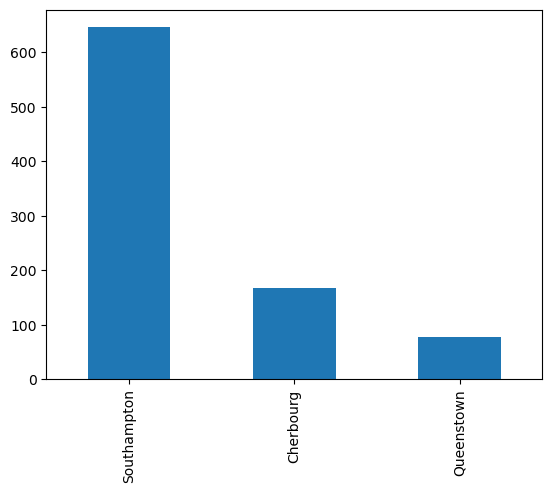

In [29]:
(
    df_titanic['embark_town']
    .value_counts()
    .plot(kind='bar')
);

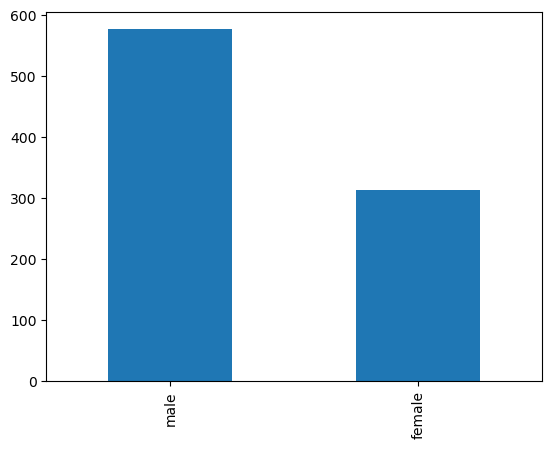

In [30]:
(
    df_titanic['gender']
    .value_counts()
    .plot(kind='bar')
);